In [ ]:
from datasets import load_dataset

# Load full XSum dataset (train, validation, test)
dataset = load_dataset("xsum", trust_remote_code=True)

# Extract documents and summaries from all splits
documents = (
    dataset["train"]["document"]
    + dataset["validation"]["document"]
    + dataset["test"]["document"]
)
summaries = (
    dataset["train"]["summary"]
    + dataset["validation"]["summary"]
    + dataset["test"]["summary"]
)

In [6]:
# Compute word counts for documents and summaries
doc_word_counts = [len(doc.split()) for doc in documents]
summary_word_counts = [len(summary.split()) for summary in summaries]

In [7]:
import numpy as np

print("📊 Document Word Count Stats:")
print(f"Min: {np.min(doc_word_counts)}")
print(f"Max: {np.max(doc_word_counts)}")
print(f"Mean: {np.mean(doc_word_counts):.2f}")
print(f"Median: {np.median(doc_word_counts)}")

print("\n📊 Summary Word Count Stats:")
print(f"Min: {np.min(summary_word_counts)}")
print(f"Max: {np.max(summary_word_counts)}")
print(f"Mean: {np.mean(summary_word_counts):.2f}")
print(f"Median: {np.median(summary_word_counts)}")

📊 Document Word Count Stats:
Min: 0
Max: 29189
Mean: 373.74
Median: 295.0

📊 Summary Word Count Stats:
Min: 1
Max: 86
Mean: 21.10
Median: 21.0


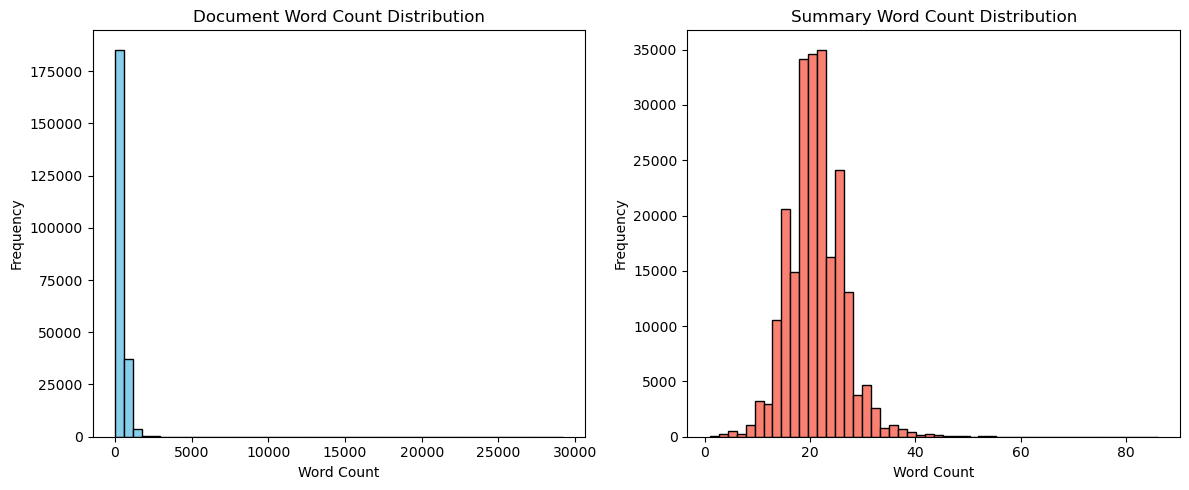

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(doc_word_counts, bins=50, color='skyblue', edgecolor='black')
plt.title("Document Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(summary_word_counts, bins=50, color='salmon', edgecolor='black')
plt.title("Summary Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

📉 Length Ratio (Summary / Document) Stats:
Min: 0.000
Max: 10.333
Mean: 0.100
Median: 0.071


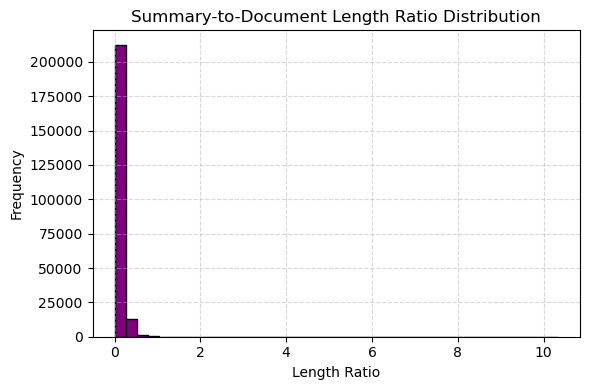

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Compute ratio of summary length to document length
length_ratios = [s / d for s, d in zip(summary_word_counts, doc_word_counts) if d > 0]

# Basic stats
print("📉 Length Ratio (Summary / Document) Stats:")
print(f"Min: {np.min(length_ratios):.3f}")
print(f"Max: {np.max(length_ratios):.3f}")
print(f"Mean: {np.mean(length_ratios):.3f}")
print(f"Median: {np.median(length_ratios):.3f}")

# Plot distribution
plt.figure(figsize=(6, 4))
plt.hist(length_ratios, bins=40, color='purple', edgecolor='black')
plt.title("Summary-to-Document Length Ratio Distribution")
plt.xlabel("Length Ratio")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Inspecting inadequate pairs of document, summary

In [11]:
from datasets import load_dataset
import heapq

# Load dataset
dataset = load_dataset("xsum", trust_remote_code=True)

# Combine splits
documents = (
    dataset["train"]["document"]
    + dataset["validation"]["document"]
    + dataset["test"]["document"]
)
summaries = (
    dataset["train"]["summary"]
    + dataset["validation"]["summary"]
    + dataset["test"]["summary"]
)

# Compute word counts and ratios
doc_word_counts = [len(d.split()) for d in documents]
summary_word_counts = [len(s.split()) for s in summaries]
length_ratios = [s / d if d > 0 else 0 for s, d in zip(summary_word_counts, doc_word_counts)]

# Find top 5 ratios
indexed_ratios = list(enumerate(length_ratios))
top5 = heapq.nlargest(5, indexed_ratios, key=lambda x: x[1])

# Display results
for i, ratio in top5:
    print(f"\n🔢 Index: {i} — Ratio: {ratio:.2f}")
    print(f"📄 Document ({doc_word_counts[i]} words):\n{documents[i]}")
    print(f"\n📝 Summary ({summary_word_counts[i]} words):\n{summaries[i]}")
    print("-" * 80)
from datasets import load_dataset
import heapq

# Load dataset
dataset = load_dataset("xsum", trust_remote_code=True)

# Combine splits
documents = (
    dataset["train"]["document"]
    + dataset["validation"]["document"]
    + dataset["test"]["document"]
)
summaries = (
    dataset["train"]["summary"]
    + dataset["validation"]["summary"]
    + dataset["test"]["summary"]
)

# Compute word counts and ratios
doc_word_counts = [len(d.split()) for d in documents]
summary_word_counts = [len(s.split()) for s in summaries]
length_ratios = [s / d if d > 0 else 0 for s, d in zip(summary_word_counts, doc_word_counts)]

# Find top 5 ratios
indexed_ratios = list(enumerate(length_ratios))
top5 = heapq.nlargest(5, indexed_ratios, key=lambda x: x[1])

# Display results
for i, ratio in top5:
    print(f"\n🔢 Index: {i} — Ratio: {ratio:.2f}")
    print(f"📄 Document ({doc_word_counts[i]} words):\n{documents[i]}")
    print(f"\n📝 Summary ({summary_word_counts[i]} words):\n{summaries[i]}")
    print("-" * 80)


🔢 Index: 54003 — Ratio: 10.33
📄 Document (3 words):
Here's my take.

📝 Summary (31 words):
It's much better than it used to be, but female leadership in the United States - in politics and business - has still a long way to go to achieve parity.
--------------------------------------------------------------------------------

🔢 Index: 86960 — Ratio: 9.40
📄 Document (5 words):
Read more by TAPPING HERE.

📝 Summary (47 words):
Eighties pop idols Bananarama are reforming for their first tour in 30 years, Ed Sheeran breaks a 22-year chart record in Australia; Rihanna is criticised for adding the Queen's face to her body in Instagram posts plus new music from Dua Lipa and The War on Drugs.
--------------------------------------------------------------------------------

🔢 Index: 217357 — Ratio: 8.67
📄 Document (3 words):
More to follow

📝 Summary (26 words):
Carl Frampton suffered the first defeat of his professional career as Leo Santa Cruz won on points to regain the WBA featherweight ti